### Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\Shiva\\OneDrive\\Desktop\\BUAN6341\\ipynb'

In [3]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is 8471-B1A1

 Directory of C:\Users\Shiva\OneDrive\Desktop\BUAN6341\ipynb

10/13/2021  12:26 AM    <DIR>          .
10/13/2021  12:26 AM    <DIR>          ..
10/13/2021  12:26 AM    <DIR>          .ipynb_checkpoints
10/13/2021  12:26 AM           313,488 Homework.ipynb
10/12/2021  06:07 PM           190,203 Homework_1.ipynb
10/13/2021  12:26 AM           313,488 Homework-Copy1.ipynb
09/06/2021  04:39 PM           216,517 Introduction to Machine Learning.ipynb
09/06/2021  04:28 PM           192,558 Numpy and Pandas Introduction(1).ipynb
10/03/2021  05:03 PM            45,944 Part b - Regression - Labs 1 to 3.ipynb
10/12/2021  08:49 PM            75,454 Part_b_Regression_Labs_1_to_3.ipynb
09/18/2021  10:17 PM         2,052,435 Supervised Machine Learning.ipynb
09/19/2021  08:55 PM           325,354 titanic(1).ipynb
09/12/2021  04:46 PM             2,178 Untitled.ipynb
              10 File(s)      3,727,619 bytes
               3 Di

In [4]:
df_classification = pd.read_csv('../csv_file/classification.csv')
df_classification.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,999,blue-collar,married,basic.4y,unknown,no,yes,cellular,105.0,1,999.0,0,nonexistent,no
1,36,blue-collar,married,basic.6y,no,yes,no,cellular,125.0,5,999.0,0,nonexistent,no
2,999,admin.,single,high.school,no,no,yes,telephone,111.0,1,999.0,0,nonexistent,no
3,39,blue-collar,married,basic.6y,unknown,no,no,cellular,173.0,2,999.0,0,nonexistent,no
4,41,housemaid,married,basic.4y,unknown,no,no,cellular,107.0,1,999.0,0,nonexistent,no


### Answer 1 
Missing values

In [5]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4119 non-null   int64  
 1   job        4119 non-null   object 
 2   marital    3991 non-null   object 
 3   education  4119 non-null   object 
 4   default    4119 non-null   object 
 5   housing    4119 non-null   object 
 6   loan       4119 non-null   object 
 7   contact    4119 non-null   object 
 8   duration   4007 non-null   float64
 9   campaign   4119 non-null   int64  
 10  pdays      3958 non-null   float64
 11  previous   4119 non-null   int64  
 12  poutcome   4119 non-null   object 
 13  y          4119 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 450.6+ KB


Columns `marital`, `duration` and `pdays` have missing values based on the info of the dataframe above.

#### Type of missing values in the columns `marital`, `duration` and `pdays`

In [6]:
df_classification[df_classification['marital'].isnull()].head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
58,27,student,NaN,high.school,unknown,yes,no,telephone,38.0,9,999.0,0,nonexistent,no
59,44,management,NaN,professional.course,no,no,no,cellular,65.0,1,999.0,1,failure,no
68,55,management,NaN,university.degree,no,no,no,cellular,171.0,2,999.0,0,nonexistent,no
88,32,management,NaN,university.degree,no,yes,no,cellular,129.0,2,999.0,0,nonexistent,no
137,37,entrepreneur,NaN,basic.9y,no,no,no,cellular,69.0,1,999.0,0,nonexistent,no


In [7]:
df_classification[df_classification['duration'].isnull()].head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
30,57,retired,married,basic.4y,unknown,yes,no,telephone,NaN,1,999.0,0,nonexistent,no
192,29,technician,unknown,high.school,no,yes,no,cellular,NaN,3,999.0,0,nonexistent,no
249,29,blue-collar,married,basic.9y,no,yes,no,cellular,NaN,1,999.0,0,nonexistent,yes
300,50,technician,divorced,university.degree,unknown,no,no,cellular,NaN,2,999.0,0,nonexistent,no
332,43,blue-collar,married,basic.9y,unknown,unknown,unknown,cellular,NaN,1,999.0,0,nonexistent,no


In [8]:
df_classification[df_classification['pdays'].isnull()].head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
21,38,admin.,married,high.school,unknown,no,no,cellular,203.0,1,NaN,0,nonexistent,no
40,32,admin.,divorced,high.school,no,yes,no,cellular,134.0,1,NaN,0,nonexistent,no
87,56,blue-collar,married,unknown,no,yes,no,cellular,178.0,8,NaN,0,nonexistent,no
109,35,technician,single,professional.course,no,yes,yes,cellular,63.0,4,NaN,0,nonexistent,no
131,59,blue-collar,married,unknown,no,no,no,cellular,124.0,2,NaN,0,nonexistent,no


It can be observed that the missing values are of type np.nan

### Answer 2
Counting missing values in the dataset

Replacing 999 with np.NaN

In [9]:
df_classification['age'].describe()

count    4119.000000
mean       90.199077
std       213.543589
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max       999.000000
Name: age, dtype: float64

In [10]:
df_classification['age'].replace(999.0, np.NaN,inplace = True)

In [11]:
df_classification['age'].describe()

count    3904.000000
mean       40.149846
std        10.526973
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        95.000000
Name: age, dtype: float64

In [12]:
df_classification.isna().sum()

age          215
job            0
marital      128
education      0
default        0
housing        0
loan           0
contact        0
duration     112
campaign       0
pdays        161
previous       0
poutcome       0
y              0
dtype: int64

In [13]:
df_classification.isna().sum().sum()

616

### Answer 3

Percentage of the rows having at least one missing value

In [14]:
df_classification.isnull().any(axis=1).sum()

585

In [15]:
(df_classification.isnull().any(axis=1).sum() / len(df_classification))*100

14.202476329206117

### Answer 4

Columns with missing values

In [16]:
columns_missing_count = df_classification.isna().sum()
columns_with_missing_values = columns_missing_count[columns_missing_count > 0 ]
columns_with_missing_values.size

4

## Answer 5 
Median of column `duration`

In [17]:
df_classification['duration'].median()

182.0

### HOMEWORK_2
### Ans1

#### Imputing Missing value in the column 'marital' with the most frequent value in this column

In [19]:
df_classification['marital'].value_counts()

married     2456
single      1099
divorced     424
unknown       12
Name: marital, dtype: int64

In [20]:
df_classification['marital'].fillna('married', inplace = True)


In [21]:
df_classification['marital'].value_counts()

married     2584
single      1099
divorced     424
unknown       12
Name: marital, dtype: int64

### Ans 2

### Plot the histogram of column 'duration'

<AxesSubplot:>

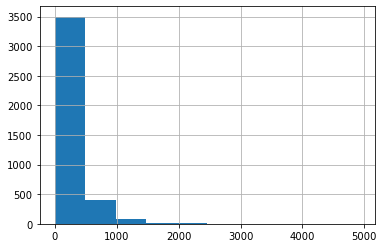

In [22]:
df_classification['duration'].hist()


### Ans 3

### Replace the missing values in the column 'duration' with the median of all available values in this column

In [23]:
df_classification['duration'].median()

182.0

In [24]:
df_classification['duration'].fillna(df_classification['duration'].median(), inplace = True)


In [25]:
type(df_classification['duration'][0])

numpy.float64

In [26]:
df_classification['duration'].mean()

259.2425345957757

### Ans 4

Study the column 'pdays'. You can see that the customer is not contacted previously,
represented as 999 in this dataset, or the number of days that passed by after the client was last contacted. 
We want to replace this column with a binary column with' not-contacted' and 'contacted' values. 
What is the frequency of 'contacted' after the data transformation?

In [27]:
df_classification['pdays'].value_counts()

999.0    3802
3.0        47
6.0        45
4.0        13
7.0         7
2.0         7
12.0        6
13.0        4
9.0         4
16.0        3
8.0         3
10.0        3
14.0        3
1.0         3
5.0         2
0.0         2
11.0        1
15.0        1
22.0        1
18.0        1
Name: pdays, dtype: int64

In [28]:
df_classification['pdays'].isna().sum()

161

In [29]:
df_classification.loc[df_classification['pdays'] < 999, 'pdays'] = 'contacted'
df_classification.loc[df_classification['pdays'] == 999, 'pdays'] = 'not-contacted'

In [30]:
df_classification['pdays'].value_counts()

not-contacted    3802
contacted         156
Name: pdays, dtype: int64

### Ans 5

(Part a)In the column 'pdays' after the transformation, replace the missing values with the value of the most frequent class in this column.
What is the frequency of the most frequent class after the data imputation?

In [31]:
df_classification['pdays'].isna().sum()

161

In [32]:
df_classification['pdays'].fillna('not-contacted', inplace = True)


In [33]:
df_classification['pdays'].value_counts()

not-contacted    3963
contacted         156
Name: pdays, dtype: int64

### Ans 6

### Replace the missing values in the column 'age' with the mean of all the available values. 
What is the mean of this column after the data imputation? Enter the answer with four digits after the decimal point.

In [34]:
df_classification['age'].mean()

40.14984631147541

In [35]:
df_classification['age'].fillna(df_classification['age'].mean() , inplace = True)

In [36]:
df_classification['age'].mean()

40.14984631147537

### Ans 7

(Part a)What should be an appropriate data transformations strategy for the column 'job'?
(Apply the transformation on the data frame)

In [37]:
df_classification.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,40.149846,blue-collar,married,basic.4y,unknown,no,yes,cellular,105.0,1,not-contacted,0,nonexistent,no
1,36.000000,blue-collar,married,basic.6y,no,yes,no,cellular,125.0,5,not-contacted,0,nonexistent,no
2,40.149846,admin.,single,high.school,no,no,yes,telephone,111.0,1,not-contacted,0,nonexistent,no
3,39.000000,blue-collar,married,basic.6y,unknown,no,no,cellular,173.0,2,not-contacted,0,nonexistent,no
4,41.000000,housemaid,married,basic.4y,unknown,no,no,cellular,107.0,1,not-contacted,0,nonexistent,no


In [38]:
df_classification['job'].value_counts()

admin.           1098
blue-collar       900
technician        672
services          375
management        278
retired           178
entrepreneur      147
self-employed     120
unemployed        116
housemaid         111
student            89
unknown            35
Name: job, dtype: int64

In [39]:
cols_job = pd.get_dummies(df_classification['job'], prefix= 'job')
df_classification[cols_job.columns] = cols_job
df_classification.drop('job', axis = 1, inplace = True)

### Ans 8

What should be an appropriate data transformations strategy for the column 'marital'? 
(Apply the transformation on the data frame)

In [40]:
df_classification['marital'].value_counts()

married     2584
single      1099
divorced     424
unknown       12
Name: marital, dtype: int64

In [41]:
cols_marital = pd.get_dummies(df_classification['marital'], prefix= 'marital')
df_classification[cols_marital.columns] = cols_marital
df_classification.drop('marital', axis = 1, inplace = True)

### Ans 9

In the column 'education', one of the values is 'unknown. 
This value can be considered as a sentinel value.
We want to replace it with the value of the most frequent class in this column. 
What is the frequency of the most frequent class after the data imputation?


In [42]:
df_classification['education'].value_counts()

university.degree      1231
high.school             942
basic.9y                612
professional.course     530
basic.4y                418
basic.6y                223
unknown                 160
illiterate                3
Name: education, dtype: int64

In [43]:
df_classification['education'] = df_classification['education'].replace(to_replace ="unknown",
                 value ="university.degree")

In [44]:
df_classification['education'].value_counts()

university.degree      1391
high.school             942
basic.9y                612
professional.course     530
basic.4y                418
basic.6y                223
illiterate                3
Name: education, dtype: int64

### Ans 10

Appropriate data transformations strategy for the column 'education' 

In [45]:
df_classification['education'] = df_classification['education'].map(
    {'illiterate':0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4,
     'professional.course':5, 'university.degree':6})

In [46]:
df_classification.head()

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,40.149846,1,unknown,no,yes,cellular,105.0,1,not-contacted,0,...,0,0,0,0,0,0,0,1,0,0
1,36.000000,2,no,yes,no,cellular,125.0,5,not-contacted,0,...,0,0,0,0,0,0,0,1,0,0
2,40.149846,4,no,no,yes,telephone,111.0,1,not-contacted,0,...,0,0,0,0,0,0,0,0,1,0
3,39.000000,2,unknown,no,no,cellular,173.0,2,not-contacted,0,...,0,0,0,0,0,0,0,1,0,0
4,41.000000,1,unknown,no,no,cellular,107.0,1,not-contacted,0,...,0,0,0,0,0,0,0,1,0,0


### Ans 11

What should be an appropriate data transformations strategy for the column 'default'

In [47]:
df_classification['default'].value_counts()

no         3281
unknown     838
Name: default, dtype: int64

In [48]:
df_classification['default'] = df_classification['default'].map({'no':1, 'unknown':0}).astype(int)


### Ans 12

In the column 'housing', one of the values is 'unknown.
This value can be considered as a sentinel value.
We want to replace it with the value of the most frequent class in this column.
What is the frequency of the most frequent class after the data imputation?

In [49]:
df_classification['housing'].value_counts()

yes        2140
no         1870
unknown     109
Name: housing, dtype: int64

In [50]:
df_classification['housing'].replace("unknown", "yes", inplace = True)

In [51]:
df_classification['housing'].value_counts()

yes    2249
no     1870
Name: housing, dtype: int64

### Ans 13

In [52]:
df_classification['housing'] = df_classification['housing'].map({'yes':1, 'no':0}).astype(int)


### Ans 14

In the column 'loan', one of the values is 'unknown'. 
This value can be considered as a sentinel value. 
We want to replace it with the value of the most frequent class in this column. 
What should be an appropriate data transformations strategy for the column 'loan'?

In [53]:
df_classification['loan'].value_counts()

no         3384
yes         626
unknown     109
Name: loan, dtype: int64

In [54]:
df_classification['loan'].replace("unknown", "no", inplace = True)

In [55]:
df_classification['loan'].value_counts()

no     3493
yes     626
Name: loan, dtype: int64

In [56]:
df_classification['loan'] = df_classification['loan'].map({'no':1, 'yes':0}).astype(int)


### Ans 15

What should be an appropriate data transformations strategy for the column 'contact'?

In [57]:
df_classification['contact'].value_counts()

cellular     2585
telephone    1534
Name: contact, dtype: int64

In [58]:
df_classification['contact'] = df_classification['contact'].map({'cellular':1, 'telephone':0}).astype(int)


### Ans 16

What should be an appropriate data transformations strategy for the column 'pdays'? 

In [59]:
df_classification['pdays'].value_counts()

not-contacted    3963
contacted         156
Name: pdays, dtype: int64

In [60]:
df_classification['pdays'] = df_classification['pdays'].map({'not-contacted':1, 'contacted':0}).astype(int)


### Ans 17

What should be an appropriate data transformations strategy for the column 'poutcome'

In [61]:
df_classification['poutcome'].value_counts()

nonexistent    3566
failure         404
success         149
Name: poutcome, dtype: int64

In [62]:
cols_poutcome = pd.get_dummies(df_classification['poutcome'], prefix= 'poutcome')
df_classification[cols_poutcome.columns] = cols_poutcome
df_classification.drop('poutcome', axis = 1, inplace = True)

In [64]:
### HW_4

(Part a)Consider 'y' as the target column of Part a data frame. 
Split this data frame into train and test with a test size of 25% of the whole data. 
Then use the MinMAxScaler to scale the train and the test. What is the best value of the hyperparameter n_neighbors? 
Build your model given the following range of values for the model hyperparameters.
n_neighbors= [1, 2, 3, 4, 5], metric = 'manhattan'

In [65]:
df_classification.isna().sum()


age                     0
education               0
default                 0
housing                 0
loan                    0
contact                 0
duration                0
campaign                0
pdays                   0
previous                0
y                       0
job_admin.              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_unknown             0
marital_divorced        0
marital_married         0
marital_single          0
marital_unknown         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
dtype: int64

In [66]:
feature_names = ['age', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
X = df_classification[feature_names]
y = df_classification['y']

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [68]:
X.head()

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,40.149846,1,0,0,0,1,105.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,36.000000,2,1,1,1,1,125.0,5,1,0,...,0,0,0,0,1,0,0,0,1,0
2,40.149846,4,1,0,0,0,111.0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3,39.000000,2,0,0,1,1,173.0,2,1,0,...,0,0,0,0,1,0,0,0,1,0
4,41.000000,1,0,0,1,1,107.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [69]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [70]:
X_train

array([[0.09210526, 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.42105263, 0.16666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.36842105, 0.5       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.27828745, 0.83333333, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.07894737, 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11842105, 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [71]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,6):
    knn = KNeighborsClassifier(k, p=1)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

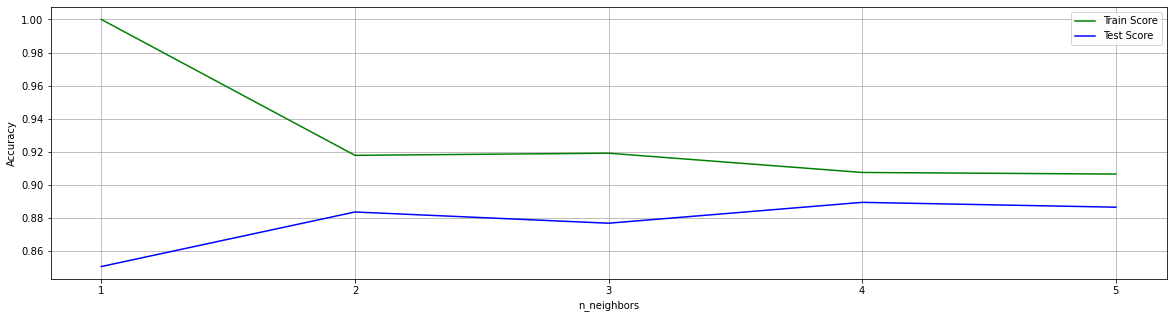

In [74]:
import matplotlib.pyplot as plt

x_axis = range(1,6)
%matplotlib inline


plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(1,6))
plt.grid()
plt.legend()

Train a KNeighborsClassifier with the best hyperparameters found in the previous questions on the training dataset. What is the test score of this model? (Enter the answer with two digits after the decimal point)



In [75]:
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9068
Test score: 0.8864


Find the best hyperparameters of a LogisticRegression machine learning model. Which of the following values of C will result in a model with the smallest gap between the train and test accuracy score? Use the following parameters to create your model: solver = 'lbfgs', penalty = 'l2', max_iter = 1000.


In [76]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    #log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l1 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 1000)
    log_l1.fit(X_train, y_train)
    #log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    #train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    #test_score_l2.append(log_l2.score(X_test, y_test))
  

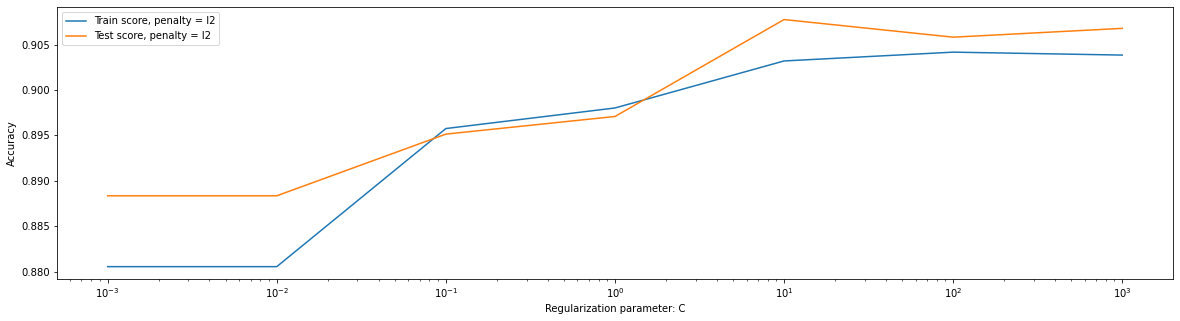

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l2')
#plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
#plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [78]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

#X_b = X_train[200:, [7,23]]
#y_b = y_train[200:]

lreg = LogisticRegression(C = 0.1, penalty = 'l2')

lreg.fit(X_train, y_train) 
lreg.score(X_test, y_test)

0.8951456310679612

Train a SVC model on the train dataset with a different range of values for C and gamma. Which tuple of (C, gamma) results in a best fit. To answer this question find a pair that results in a smallerst gap between the train and test score.

In [79]:
from sklearn.svm import SVC, LinearSVC
svc_score_diff = []
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1,10]
for x, y in [(x,y) for x in gamma for y in c]:
    clf1 = SVC(kernel='rbf', gamma=y, C=x)
    clf1.fit(X_train,y_train)
    svc_score_diff.append(abs(clf1.score(X_train,y_train)-clf1.score(X_test,y_test)))
    print((x,y),(clf1.score(X_train,y_train)-clf1.score(X_test,y_test)))
min(svc_score_diff)

(0.01, 0.01) -0.007805649234521539
(0.01, 0.1) -0.007805649234521539
(0.01, 1) -0.007805649234521539
(0.01, 10) -0.007805649234521539
(0.1, 0.01) -0.007805649234521539
(0.1, 0.1) 0.0035264499460974097
(0.1, 1) -0.007805649234521539
(0.1, 10) -0.007805649234521539
(1, 0.01) 0.004821367395110077
(1, 0.1) 0.004821367395110077
(1, 1) 0.015181021287562824
(1, 10) 0.04139964232619975
(10, 0.01) 0.004821367395110077
(10, 0.1) 0.00805834671729
(10, 1) 0.05208333988125735
(10, 10) 0.08963406010051322


0.0035264499460974097

The last model we will explore in this Lab is DecisionTreeClassifier. As seen in the lectures, there are many different early stopping conditions to control a decision tree model complexity. We want to see which early stopping condition works better for this dataset. For this purpose, you should train a DecisionTreeClassifier model with one of the following early stopping conditions. Which is the best choice in terms of train accuracy for this dataset?

In [80]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion= 'entropy')
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
tree.score(X_test, y_test)

0.8611650485436894

In [81]:
tree = DecisionTreeClassifier(min_samples_leaf=50)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)


0.904823567497572

In [82]:
tree = DecisionTreeClassifier(max_depth= 7)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)


0.9329880220135967

In [83]:
tree = DecisionTreeClassifier(min_samples_split = 150)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9080608611201036

In [84]:
tree = DecisionTreeClassifier(min_impurity_decrease = 0.005)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.8947879572677242

Train the DecisionTree model with max_depth= 2, random_state = 0. Plot this tree using the GraphViz tool in Python. What is the gini score of the leaf node with the highest number of samples? Enter the answer with four digits after the decimal point.

In [85]:
# import os 
# import graphviz

# # os.environ["PATH"] += os.pathsep + 'C:/Users/Shiva/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/dot.bat'
# tree = DecisionTreeClassifier(max_depth= 2,random_state = 0)
# tree.fit(X_train, y_train)
# tree.score(X_train, y_train)

# # Create DOT data
# from sklearn.tree import export_graphviz

# dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X.columns) 

# # Draw graph
# graph = graphviz.Source(dot_data) 

# # Show graph
# graph 

# Homework_5


For this lab, we consider the 'yes' in the target column as the positive label. The easiest way we can enforce this assumption is to map 'no' tp 0 and 'yes' to 1. From now on, the target column of X_train and X_test should hold binary values 0 and 1. Use the GridSearchCV with 5 folds and the default scoring to find the best hyperparameters of a SVC model on this dataset. Which of the following is the best set of hyperparameters: (Set random_state = 0.

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
y_train = y_train.map(dict(yes=1, no=0))
y_test = y_test.map(dict(yes=1, no=0)) 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [87]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.01}
Best cross-validation score: 0.89803


What is the best score of the grid search model in the previous question. Enter the answer with four digits after the decimal point.

In [88]:
 0.89803


0.89803

Now instantiate a SVC model with the best hyperparameters you have found in the last two questions. Based on the recall and precision score of the test data frame, which of the following statements is true?

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
svc = SVC(kernel = 'rbf', C = 1, gamma = 0.01)
svc.fit(X_train, y_train)
y_predict = np.where(svc.decision_function(X_test) >= 0, 1, 0)
# y_predict = svc.predict(X_test)
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

Precision:  0.5641025641025641
Recall:  0.19130434782608696


Use the GridSearchCV with 5 folds and the scoring function you choose in the previous question to find the best hyperparameters of a SVC model on this dataset. Which of the following is the best set of hyperparameters: (Set random_state = 0.

In [90]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search = GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},scoring='recall',
                         return_train_score=True )
grid_search.fit(X_train, y_train)


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall')

In [91]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.31973


# Now run a logistic regression model on this dataset with the following hyperparameters: C = 1, 
penalty = 'l2', random_state = 0. Use the best evaluation function in the previous question.
Which of the following statements is correct:

In [138]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, f1_score

lr = LogisticRegression(C=1, penalty = 'l2', random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

print('Macro recall test: ', recall_score(y_test, pred_test, average= 'macro'))
print('Macro recall train: ', recall_score(y_train, pred_train, average= 'macro'))

Macro recall test:  0.5999524827750059
Macro recall train:  0.6165047624740954


### Plot the precision_recall curve of the model in the previous question. Which value of threshold will give the smallest distance of precision to 0.5

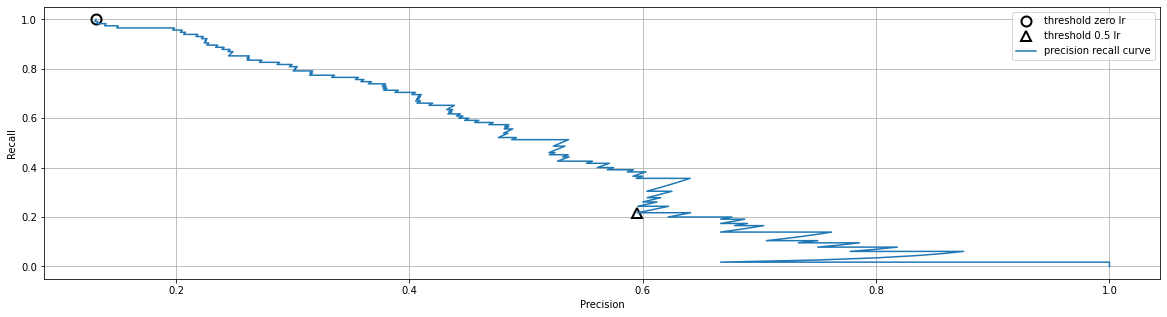

In [207]:
from sklearn.metrics import precision_recall_curve

plt.subplots(figsize = (20,5))

precision, recall, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
                                                                
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero lr", fillstyle="none", c='k', mew=2)

close_default_lr = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_default_lr], recall[close_default_lr], '^', c='k',
         markersize=10, label="threshold 0.5 lr", fillstyle="none", mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [208]:
thresholds[close_default_lr]

0.4956223123710961

##### Now, change the threshold to the value you have found in the previous question. What is the test recall score considering the new probability threshold? (Enter the answer with four digits after the decimal point)

In [209]:
recall[close_default_lr]

0.21739130434782608

#### Now train a SVC model with the following list of parameters on this dataset: kernel = 'rbf', C = 0.5, gamma = 0.1. What is the roc_auc score of the test dataset? Enter your answer with four digits after the decimal point.)

In [210]:
from sklearn.metrics import roc_auc_score

svc = SVC(kernel = 'rbf', C = 0.5, gamma = 0.1)
svc.fit(X_train, y_train)
roc_auc_score(y_test, svc.decision_function(X_test))

0.8427655024946543

#### Use a grid search model to find the best parameters of a DecisionTreeClassifer model on this dataset. Make sure to use the scoring function you have found in the Question 6. What the best hyperparameter of this model

In [225]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

param_grid = {'max_depth': [1,2,3,4,5]}

print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(tree, param_grid, cv=5,
                 scoring='recall', return_train_score=True )
grid_search.fit(X_train, y_train)

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5]}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, return_train_score=True,
             scoring='recall')

In [226]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.38723


#### Now change the default threshold probability to 0.4. What is the test score of the Decision Tree model with the best hyperparameter you have found in the last two questions? Enter the answer with four digits after the decimal point. Compare your result with the best validation score computed in the last question.



In [233]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
y_pred = (tree.predict_proba(X_test)[:,1] >= 0.4).astype(bool) # set threshold as 0.4

recall_score(y_test, y_pred, average= 'macro')

0.7063435495367071

In [229]:
tree.predict_proba(X_test)

array([[0.90807175, 0.09192825],
       [0.90807175, 0.09192825],
       [0.72566372, 0.27433628],
       ...,
       [0.98109864, 0.01890136],
       [0.98109864, 0.01890136],
       [0.90807175, 0.09192825]])

In [231]:
tree.predict_proba(X_test)[:,0]

array([0.90807175, 0.90807175, 0.72566372, ..., 0.98109864, 0.98109864,
       0.90807175])